In [1]:
##Exploratory Data Analysis (EDA)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

In [4]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']

In [5]:
data.columns = columns

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
print(data.describe(include='all'))

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [8]:
print(data.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [9]:
print(data['class'].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64


In [10]:
##Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder = LabelEncoder()
data_encoded = data.apply(labelencoder.fit_transform)

In [13]:
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 22)
(1625, 22)
(6499,)
(1625,)


In [16]:
##Data Visualization

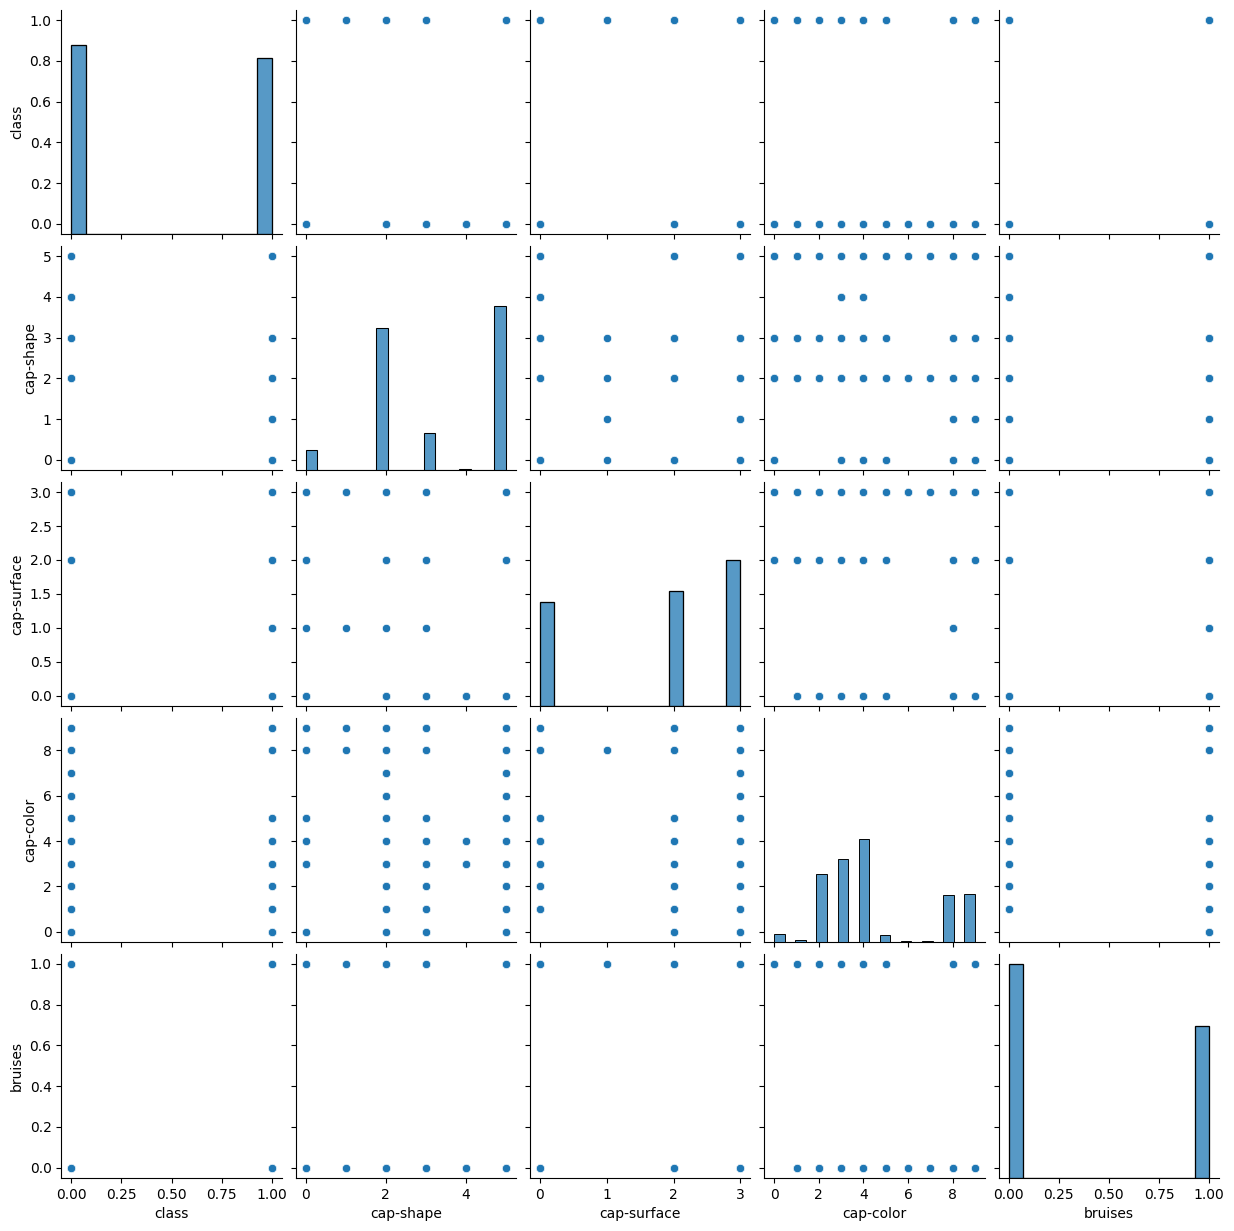

In [17]:
sns.pairplot(data_encoded.iloc[:, :5])
plt.show()

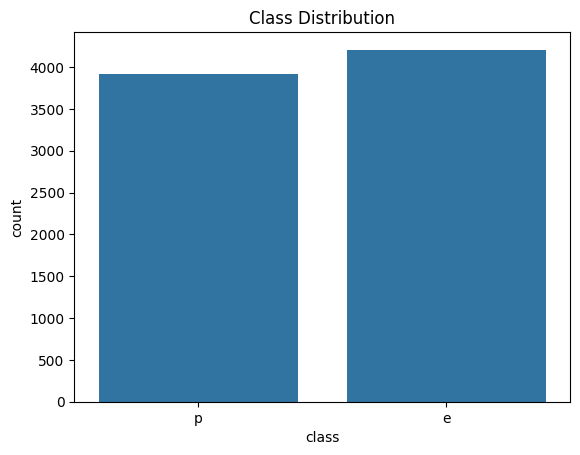

In [18]:
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

In [19]:
## SVM Implementation

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [22]:
y_pred = model.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_pred))

[[842   1]
 [ 11 771]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [25]:
##Visualization of SVM Results

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)

In [28]:
X_reduced = pca.fit_transform(X_test)

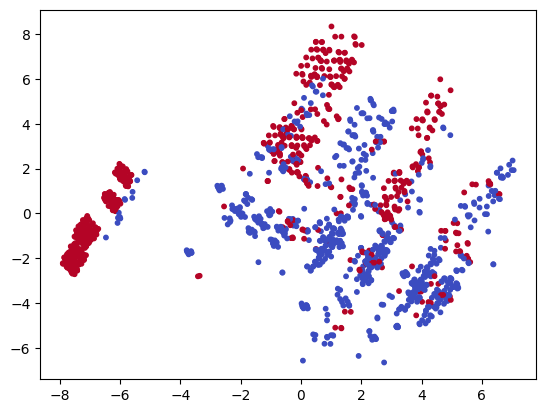

In [29]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='coolwarm', s=10)

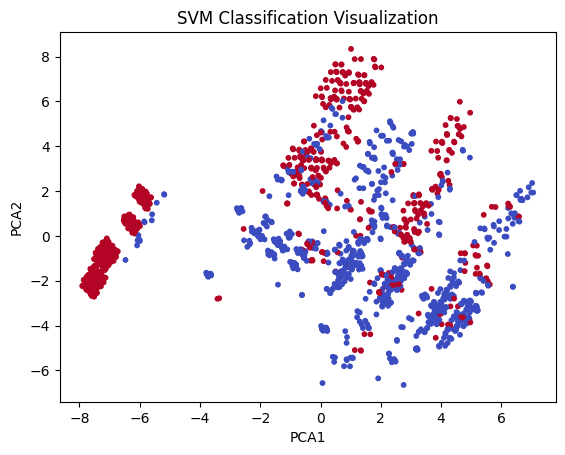

In [31]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='coolwarm', s=10)
plt.title('SVM Classification Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [32]:
## Parameter Tuning and Optimization

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

In [35]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=1)

In [36]:
print(grid.best_params_)
best_model = grid.best_estimator_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [37]:
y_pred_opt = best_model.predict(X_test)
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [38]:
##Comparison and Analysis

In [39]:
kernels = ['linear', 'poly', 'rbf']

In [40]:
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)

In [41]:
y_pred = model.predict(X_test)

In [42]:
print(f"Kernel: {k}")

Kernel: rbf


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [44]:
print("="*60)

In [ ]:
##Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and Visualization results 
##SVM Strengths Based on Mushroom EDA & Visuals:
Strength	Explanation
Handles high-dimensional data well-	One-hot encoded features create sparse but high-dimensional input; SVM thrives here.
Good with clear margin of separation-	Odor and other features visually show strong class separation—SVM maximizes the margin effectively.
Works well with balanced classes-	Equal distribution of edible and poisonous mushrooms avoids bias in decision boundary.
RBF kernel can capture non-linear relationships-	Visualization (e.g., TSNE) supports the need for non-linear kernels, which SVM can handle.
Robust generalization-	With proper hyperparameter tuning, SVM can achieve near-perfect accuracy on this dataset.
##SVM Weaknesses Based on Mushroom EDA & Visuals
Weakness	Explanation
Requires preprocessing of categorical data-	SVM does not handle raw categorical data—requires one-hot encoding, which increases dimensionality.
Computationally expensive-	RBF kernel + high-dimensional data = longer training time, especially for large datasets.
Sensitive to hyperparameters-	Kernel choice, regularization C, and RBF parameter gamma critically affect performance.
Poor interpretability-	Visualizing decision boundaries or feature impact is hard with RBF SVM compared to trees.
Vulnerable to outliers-	Though the dataset is clean, any noisy labels can shift the hyperplane unfavorably.





In [ ]:
##Discuss practical implications of SVM in real-world classification tasks.
1. Text Classification / Spam Detection
Use Case: Classifying emails as spam or not.

Why SVM Works: Handles high-dimensional, sparse data (TF-IDF vectors) efficiently.

Practical Implication: Provides high accuracy with fewer false positives in email filtering systems.
2. Image Recognition / Facial Detection
Use Case: Identifying objects or faces in images.

Why SVM Works: Effective with pixel-based, high-dimensional data using RBF or polynomial kernels.

Practical Implication: Used in surveillance, biometric authentication, and photo tagging.

3.Medical Diagnosis
Use Case: Classifying tumors as benign or malignant (e.g., breast cancer prediction).

Why SVM Works: Strong in binary classification with a clear margin.

Practical Implication: Helps assist doctors in accurate, early diagnosis using clinical data.
4.Financial Fraud Detection
Use Case: Identifying fraudulent credit card transactions.

Why SVM Works: SVM can detect patterns in non-linear, high-dimensional transaction data.

Practical Implication: Enhances security in online banking and payment systems.
5.Handwriting and Digit Recognition
Use Case: Classifying handwritten digits (e.g., MNIST dataset).

Why SVM Works: Kernel methods can model complex curves in image data.

Practical Implication: Used in postal mail sorting and digit recognition on forms.

In [ ]:
##such as comparing SVM kernels
1. Linear Kernel
Function: 
K(x,y)=xTy

Use Case: When data is linearly separable.

Pros: Fast and less computationally intensive.

Cons: Poor performance with non-linear data.
2. Polynomial Kernel
Function: 
𝐾
(
𝑥
,
𝑦
)
=
(
𝑥
𝑇
𝑦
+
𝑐
)
𝑑
K(x,y)=(x 
T
 y+c) 
d
 

Use Case: When data is not linearly separable but has polynomial patterns.

Pros: Adds flexibility by adjusting degree 
𝑑
d.

Cons: Higher degrees can lead to overfitting and increased computation.
3. Radial Basis Function (RBF) or Gaussian Kernel
Function: 
𝐾
(
𝑥
,
𝑦
)
=
exp
⁡
(
−
𝛾
∥
𝑥
−
𝑦
∥
2
)
K(x,y)=exp(−γ∥x−y∥ 
2
 )

Use Case: Most popular choice for non-linear data.

Pros: Highly flexible, handles complex data boundaries.

Cons: Requires tuning of 
𝛾
γ and C parameters.
Sigmoid Kernel
Function: 
𝐾
(
𝑥
,
𝑦
)
=
tanh
⁡
(
𝛼
𝑥
𝑇
𝑦
+
𝑐
)
K(x,y)=tanh(αx 
T
 y+c)

Use Case: Inspired by neural networks.

Pros: Mimics the behavior of an artificial neuron.

Cons: Not commonly used; performance often inferior to RBF or polynomial.

                             
